# Notebook Kmeans Sargazo

In [1]:
import os
import cv2
import glob
import shutil
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from skimage.io import imread
#%matplotlib t
#%matplotlib qt
import pandas as pd


# Kmeans using OpenCV

### **OpenCV Kmeans parameters**

**samples :** It should be of np.float32 data type, and each feature should be put in a single column.

**nclusters(K):** Number of clusters required at end

**criteria:** It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.

cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.

cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.


**flags :** This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

maxIterations is the maximum number of iterations to run.

epsilon determines the distance threshold within which we consider k-means to have converged.

## Functions


In [2]:
#Function who has as a result a list with all the pixel labels, the centroids, and the array to visualize the image 
def getKMeans2(img,K):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)/256
    res = center[label.flatten()]
    #res2 = image
    res2 = res.reshape((img.shape))
    return(label,center,res2)
#label= is the label of each pixel
#center = the centroids of each cluster, that is the same as the color 

### Histogram 

In [27]:
#Upload image you want to analize
img = imread('bellota.jpg')

<bound method Figure.show of <Figure size 864x432 with 2 Axes>>

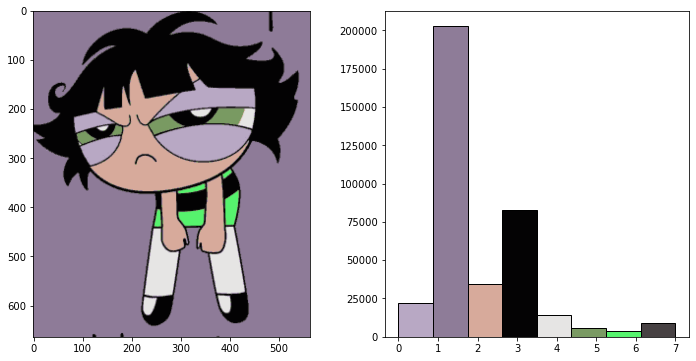

In [23]:
#k is the number of clusters  
k = 8
label_hist,colors,ima = getKMeans2(img,k)

fig, axs = plt.subplots(1, 2,figsize=(12,6))
axs[0].imshow(ima)
cnts, values, bars = axs[1].hist(label_hist,bins = k,edgecolor='k')

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(colors[i % len(colors)])

fig.show

<bound method Figure.show of <Figure size 864x432 with 2 Axes>>

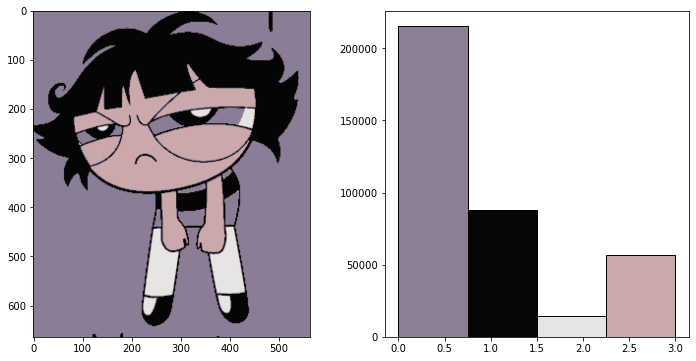

In [25]:
k = 4
label_hist,colors,ima = getKMeans2(img,k)

fig, axs = plt.subplots(1, 2,figsize=(12,6))
axs[0].imshow(ima)
cnts, values, bars = axs[1].hist(label_hist,bins = k,edgecolor='k')

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(colors[i % len(colors)])

fig.show